# Classifiers

The classification problem:

* Given two or more categories of observation 
* Extract numerical features for each observation
* Train some kind of model of each category
* Use the model to predict the category of new observations
* This is the basis of **supervised machine learning**

# Outline

* Distance measures
* K Nearest Neighbor Classifier
* Running classification experiments
* Training, testing, validation
* Evaluating classification experiments


# Distance Metrics

* How do we tell if two samples are similar or different? 
* Use a __distance metric__ a numerical measure of similarity
* Should be small if they are similar
* Large if they are different
* For numerical data, use __Euclidean Distance__
* Alternative __Manhattan Distance__ is faster to compute

# K Nearest Neighbours

* Simple classification method
* To train the model: remember all the training data
* To label an unknown point: 
    * Measure the distance to the K nearest labelled points
    * Take the most frequent label as the response
* Can be very effective for some problems
* Costly to compute for very large training data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


In [2]:
# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

print("Data:", X[:10])
print("Labels:", y[:10])

Data: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]]
Labels: [0 0 0 0 0 0 0 0 0 0]


In [3]:
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

# Compute the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [4]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.rcParams['figure.figsize'] = (6, 6)


(1.0, 5.3800000000000043)

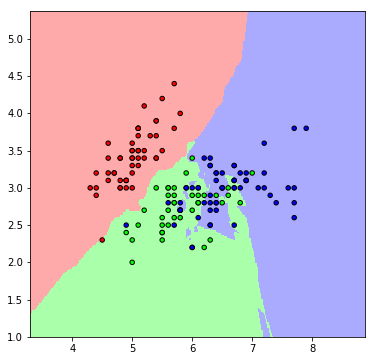

In [5]:
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max())

# Running Classification Experiments

* Training and testing data
    * We can't train and test on the same data
    * Usually split into at least two data sets
    * One for training, one reserved for testing
* Evaluation
    * How do we know how well we did? 
    * Percent correct? 
    * Precision & Recall


In [13]:
# Train test split using sklearn library
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# load the iris data set
# data is the 4 dimensional data
# target is the labels for each row
data, target = load_iris(True)

# use random selection to split data 80:20
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


# Other Selection Methods

We might also select test data by other criteria

* Select one or more speakers as test subjects
    * Has the advantage that this speaker is totally unknown to the system
    * However, in our small dataset, speakers might be very different
* Select one or more words as test data
    * Eg. select words [1, 2, 3] in English and Chinese as test data
    * Advantage is that these phonemes will be different to training data
* Select one language as training data, the other as test data
    * Test data is quite different to training data
    * 50:50 split might not be enough data for training

# Precision and Recall

* For a given category
    * Precision: how many correct over how many predicted in that category
    * Recall: how many correct over the total true labels for that category
* Eg. 
    * If I have 100 male and 100 female speakers
    * My prediction has 80 male and 120 female
    * Of my 80 male predictions, 70 are actually male
    * Of the 120 female predictions, 90 are female
    

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# creat a KNN classifier 
nn = KNeighborsClassifier(n_neighbors=3)
# fit the training data
nn.fit(X_train, y_train)

# now get the predicted labels for the test data
predicted = nn.predict(X_test)

# and print the classification report for precision and recall
print(classification_report(y_test, predicted))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



In [15]:
# can also look at a confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Naive Bayes Classifiers

* Another classification algorithm
* Decisions based on the _probability_ of class membership
* Naive assumption is that each feature is independent
* Model probability via a Gaussian model
* Details of the formula on [sklearn website](http://scikit-learn.org/stable/modules/naive_bayes.html)

Formula for Naive Bayes on the assumption that all $P(x_i|y)$ are independant:

$y' = argmax\{P(y) \prod_{i=1}^{n}P(x_i|y)\}$

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predicted = gnb.predict(X_test)
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      0.92      0.96        13
          2       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45



# File average vs Frame-by-Frame classification

* We've seen some examples of classifying each file with one feature vector per file
* This is necessarily an average over the file or a snapshot from some point in time
* Alternative is to use __every__ frame in the data 
* Generate labels for every frame 
* Classify every frame in the unknown file
    * Count the most frequent predicted label as the prediction

In [19]:
def features(datafile, label):
    """Generate mfcc feature vectors for a single data file
    return a 2 dimensional numpy array with one row per frame
    and an array of labels for each frame"""
    y, sr = librosa.load(datafile)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    labels = np.full((mfcc.shape[1],), label)
    return np.array(mfcc), labels

def extract_frame_features(datafiles, target):
    """Given a list of sound files and their target labels
    Compute a sequence of features for each file
    Concatenate these features into a single np.array
    Return these features and a corresponding array
    of target labels, one for every frame"""
    
    data = None
    frame_target = []
    for i in range(len(target)):
        frames, labels = features(datafiles[i], target[i])
        frame_target.extend(labels)
        if data is None:
            # transpose the frames 
            data = frames.T
        else:
            # concatenate the tranposed frames
            data = np.concatenate((data, frames.T))

    frame_target = np.array(frame_target)
    
    return data, frame_target

#data, target = extract_frame_features(datafiles, target)
    